In [18]:
%matplotlib inline
import matplotlib.pyplot as plt       # Necessary imports
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
# Loading the measured data of background, Silver and Indium
unterg = np.loadtxt('data/UntergrundAGDKMZ.dat', usecols=[1])
n1 =np.loadtxt("data/Messung1.dat", usecols=[1])
n2 =np.loadtxt("data/Messung2.dat", usecols=[1])
n3 =np.loadtxt("data/Messung3.dat", usecols=[1])
n4 =np.loadtxt("data/Messung4.dat", usecols=[1])
NI =np.loadtxt("data/MessungIndium.dat", usecols=[1], skiprows=1)

# Half-life of Silver

Average: 19.333333333333332 Error: 1.083888746511751


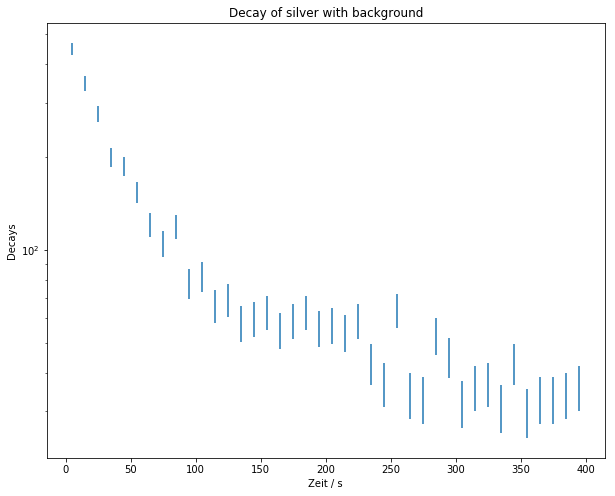

In [19]:
# Calculating the average background and summed measurements + their errors
mittelw_unterg=np.mean(4*unterg)  #*4 since the individual results are summed over
fehler_unterg=np.std(4*unterg)/np.sqrt(len(unterg))
print("Average:", mittelw_unterg, "Error:",fehler_unterg)
N=n1+n2+n3+n4
Fehler_N=np.sqrt(N)   # Since Poisson distribution
Fehler_NI=np.sqrt(NI)
# Draw silver decay
plt.figure(1, figsize=(10,8))
t=np.arange(5,405,10)
plt.errorbar(t,N, Fehler_N, linestyle='None')
plt.xlabel('Zeit / s')
plt.ylabel('Decays')
plt.title('Decay of silver with background')
plt.yscale('log')

A1= 418.78656102902596 , Standard deviation= 23.41285529266548
l1= 0.03365179903387025 , Standard deviation= 0.0032897531686747264
A2= 79.1705216873784 , Standard deviation= 14.497061794228625
l2= 0.004626778147107051 , Standard deviation= 0.0007483992830043711
chi2= 37.23220615087864
chi2_red= 1.0342279486355177
Probability= 41.0 %


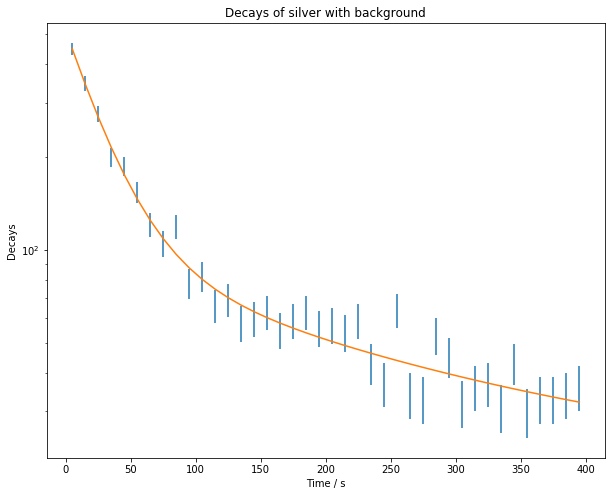

In [20]:
y_0=mittelw_unterg   # Define the fit funtion for silver
def fit_func(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y_0
# Fit the data with this fit curve
popt, pcov = curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001], sigma=Fehler_N, maxfev=5000)
# Plot fitted curve
plt.figure(2, figsize=(10,8))
plt.errorbar(t,N, Fehler_N, linestyle='None')
plt.xlabel('Time / s')
plt.ylabel('Decays')
plt.title('Decays of silver with background')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt))
plt.savefig('data/Silver.pdf',format='pdf')

print("A1=",popt[0], ", Standard deviation=", np.sqrt(pcov[0][0]))
print("l1=",popt[1], ", Standard deviation=", np.sqrt(pcov[1][1]))
print("A2=",popt[2], ", Standard deviation=", np.sqrt(pcov[2][2]))
print("l2=",popt[3], ", Standard deviation=", np.sqrt(pcov[3][3]))

chi2_=np.sum((fit_func(t,*popt)-N)**2/Fehler_N**2)
dof=len(N)-4 #dof: degrees of freedom
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Probability=", prob,"%")

In [21]:
y_0=mittelw_unterg-fehler_unterg
# Fit the data with this fit curve
poptm, pcovm = curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001], sigma=Fehler_N, maxfev=5000)
# Plot fitted curve
print("l1-=",poptm[1], ", Standard deviation=", np.sqrt(pcovm[1][1]))
print("l2-=",poptm[3], ", Standard deviation=", np.sqrt(pcovm[3][3]))

y_0=mittelw_unterg+fehler_unterg
# Fit the data with this fit curve
poptp, pcovp = curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001], sigma=Fehler_N, maxfev=5000)
# Plot fitted curve
print("l1+=",poptp[1], ", Standard deviation=", np.sqrt(pcovp[1][1]))
print("l2+=",poptp[3], ", Standard deviation=", np.sqrt(pcovp[3][3]))

dl1=np.sqrt(pcov[1][1]+((abs(popt[1]-poptp[1])+abs(popt[1]-poptm[1]))/2)**2)
dl2=np.sqrt(pcov[3][3]+((abs(popt[3]-poptp[3])+abs(popt[3]-poptm[3]))/2)**2)
T1=np.log(2)/popt[1]
T2=np.log(2)/popt[3]
LT1=T1/np.log(2)
LT2=T2/np.log(2)
dT1=T1*dl1/popt[1]
dT2=T2*dl2/popt[1]
dLT1=dT1/np.log(2)
dLT2=dT2/np.log(2)
sigma1=np.abs(T1-24.6)/dT1
sigma2=np.abs(T2-2.41*60)/dT2
print("Half-life of 110Ag:",T1, "±" , dT1, "s")
print("Sigma deviation",sigma1)
print("Life time of 110Ag:",LT1, "±" , dLT1, "s")
print("Half-life of 108Ag:",T2, "±" , dT2, "s")
print("Sigma deviation",sigma2)
print("Life time of 108Ag:",LT2, "±" , dLT2, "s")

l1-= 0.03350971259631299 , Standard deviation= 0.003219420424022236
l2-= 0.004431451182924495 , Standard deviation= 0.0007149588158268632
l1+= 0.0338070097225549 , Standard deviation= 0.0033689264008430458
l2+= 0.004838865416137697 , Standard deviation= 0.000785297052948378
Half-life of 110Ag: 20.597626292202047 ± 2.015649903423834 s
Sigma deviation 1.985649244444395
Life time of 110Ag: 29.716093305844023 ± 2.907968119837884 s
Half-life of 108Ag: 149.8120632806533 ± 3.452961356948144 s
Sigma deviation 1.5094473241542106
Life time of 108Ag: 216.13312076034208 ± 4.981570226050313 s


# Half-life of Indium

A= 680.9371812695574 , Standard deviation= 23.41285529266548
l= 0.00018898913519891476 , Standard deviation= 0.0032897531686747264
chi2= 20.83321303081922
chi2_red= 1.8616103075439319
Probability= 98.0 %


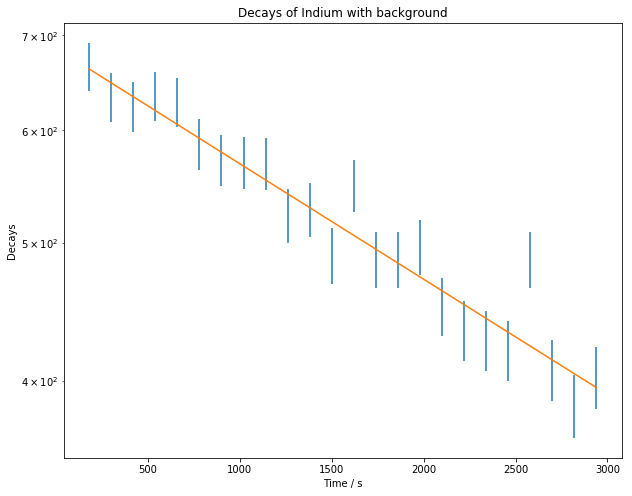

In [25]:
mean_bg_I=np.mean(unterg)
error_bg_I=np.std(unterg)/np.sqrt(len(unterg))

tI=np.arange(60,3060,120)
tI=tI[1:]
y_0=mean_bg_I   # Define the fit funtion for silver
def fit_func_I(x, A,l):
    return A*np.exp(-x*l) + y_0
# Fit the data with this fit curve
poptI, pcovI = curve_fit(fit_func_I,tI,NI, p0=[600,0.0002], sigma=Fehler_NI, maxfev=5000)
# Plot fitted curve
plt.figure(2, figsize=(10,8))
plt.errorbar(tI,NI, Fehler_NI, linestyle='None')
plt.xlabel('Time / s')
plt.ylabel('Decays')
plt.title('Decays of Indium with background')
plt.yscale('log')
plt.plot(tI,fit_func_I(tI,*poptI))
plt.savefig('data/Indium.pdf',format='pdf')

print("A=",poptI[0], ", Standard deviation=", np.sqrt(pcov[0][0]))
print("l=",poptI[1], ", Standard deviation=", np.sqrt(pcov[1][1]))

chi2_I=np.sum((fit_func_I(tI,*poptI)-NI)**2/Fehler_NI**2)
dofI=len(NI)-4 #dof: degrees of freedom
chi2_redI=chi2_/dofI
print("chi2=", chi2_I)
print("chi2_red=",chi2_redI)
prob=round(1-chi2.cdf(chi2_I,dof),2)*100
print("Probability=", prob,"%")

In [32]:
y_0=mean_bg_I-error_bg_I
# Fit the data with this fit curve
poptmI, pcovmI = curve_fit(fit_func_I,tI,NI, p0=[600,0.0002], sigma=Fehler_NI, maxfev=5000)
# Plot fitted curve
print("l1-=",poptmI[1], ", Standard deviation=", np.sqrt(pcovmI[1][1]))

y_0=mean_bg_I+error_bg_I
# Fit the data with this fit curve
poptpI, pcovpI = curve_fit(fit_func_I,tI,NI, p0=[600,0.0002], sigma=Fehler_NI, maxfev=5000)
# Plot fitted curve
print("l1+=",poptpI[1], ", Standard deviation=", np.sqrt(pcovpI[1][1]))

dlI=np.sqrt(pcovI[1][1]+((abs(poptI[1]-poptpI[1])+abs(poptI[1]-poptmI[1]))/2)**2)
T=np.log(2)/poptI[1]
LT=T/np.log(2)
dT=T*dlI/poptI[1]
dLT=dT/np.log(2)
sigmaI=np.abs(T-3240)/dT
print("Half-life of 116In:",T, "±" , dT, "s")
print("Sigma deviation",sigmaI)
print("Life time of 116In:",LT, "±" , dLT, "s")

l1-= 0.00018888851932477037 , Standard deviation= 1.0675603389072107e-05
l1+= 0.0001890898588216238 , Standard deviation= 1.068725712070205e-05
Half-life of 116In: 3667.656237647706 ± 207.30049774066958 s
Sigma deviation 2.062977379739332
Life time of 116In: 5291.309465739819 ± 299.0714000642778 s
